In [27]:
from utils import *
debug = True

In [7]:
d_event_1000 = importdphideta(1000)
print(d_event_1000[0:5])

     phi    eta
0 -0.060 -2.065
1  0.017 -1.913
2 -0.071 -1.356
3 -0.009 -2.731
4  0.001 -0.569


In [ ]:
d_event_0to1500 = importdphidetarange(0, 1500)

In [28]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=3.15, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] >= rangex or instance['phi'] <= -rangex or instance['eta'] >= rangey or instance['eta'] <= -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx) 
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
        if index % 1000000 == 0 and debug:
            print("at",index)
        if index == 10000000:
            break
    z_data = z_data.T
    return phi_data, eta_data, z_data/sum(z_data)

In [17]:
single_x, single_y, single_z = surfacedata(d_event_1000, 0.05, 1, 3.15, 6)

In [29]:
mixed_x, mixed_y, mixed_z = surfacedata(d_event_0to1500, 0.05, 1, 3.15, 6)

at 0
at 1000000
at 2000000
at 3000000
at 4000000
at 5000000
at 6000000
at 7000000
at 8000000
at 9000000
at 10000000


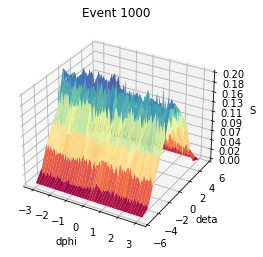

In [53]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = single_x
Y = single_y
X, Y = np.meshgrid(X, Y)
Z = single_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 1000')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/SingleEvent.png')
plt.show()

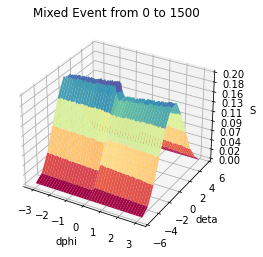

In [52]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = mixed_x
Y = mixed_y
X, Y = np.meshgrid(X, Y)
Z = mixed_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Mixed Event from 0 to 1500')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/Mixed Event.png')
plt.show()

(12, 126) (12, 126)


In [50]:
cor_z = np.divide(mixed_z, single_z, out=np.zeros_like(mixed_z), where=single_z!=0)
cor_z = cor_z/sum(cor_z)

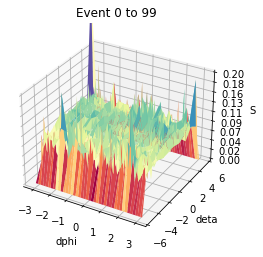

In [51]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = mixed_x
Y = mixed_y
X, Y = np.meshgrid(X, Y)
Z = cor_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0 to 99')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/Correlation.png')
plt.show()